In [2]:
#Understand the data
import pandas as pd

#Load the dataset
file_path = "SYB67_328_202411_Intentional homicides and other crimes (1).csv"
df = pd.read_csv(file_path)

#Display shape
print("Shape of dataset:", df.shape)

#Show first rows
print("\nFirst 10 rows:")
display(df.head(5))

#Show columns names
print("\nColumn names:")
print(df.columns.tolist())

#Check for missing values
print("\nMissing values per column")
print(df.isnull().sum())

Shape of dataset: (4241, 7)

First 10 rows:


,T12,Intentional homicides and other crimes,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2005,"Intentional homicide rates per 100,000",6.3,Estimate.,United Nations Office on Drugs and Crime (UNOD...
2,1,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,10.1,Estimate.,United Nations Office on Drugs and Crime (UNOD...
3,1,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,2.6,Estimate.,United Nations Office on Drugs and Crime (UNOD...
4,1,"Total, all countries or areas",2010,"Intentional homicide rates per 100,000",6.1,Estimate.,United Nations Office on Drugs and Crime (UNOD...



Column names:
['T12', 'Intentional homicides and other crimes', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']

Missing values per column
T12                                          0
Intentional homicides and other crimes       1
Unnamed: 2                                   0
Unnamed: 3                                   0
Unnamed: 4                                   0
Unnamed: 5                                3954
Unnamed: 6                                   0
dtype: int64


In [3]:
df = pd.read_csv(file_path)

new_colums = df.iloc[0].tolist()
df.columns = new_colums

#Rename the columns
df = df.rename(columns={
    "Region/Country/Area": "Country", 
     "Year": "Year", 
    "Series": "Series", 
    "Value": "Value", 
    "Footnotes": "Footnotes", 
    "Source": "Source"})

#Drop the first row
df = df.drop(0).reset_index(drop=True)

#Convert year to integer
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

#Convert value to float
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

#Preview cleaned dataset
print("Shape after cleaning:", df.shape)
display(df.head(5))

#Check for missing values again
print("\nMissing values aftr cleaning:")
print(df.isnull().sum())


Shape after cleaning: (4240, 7)


,Country,NaN,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,"Intentional homicide rates per 100,000",6.3,Estimate.,United Nations Office on Drugs and Crime (UNOD...
1,1,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,10.1,Estimate.,United Nations Office on Drugs and Crime (UNOD...
2,1,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,2.6,Estimate.,United Nations Office on Drugs and Crime (UNOD...
3,1,"Total, all countries or areas",2010,"Intentional homicide rates per 100,000",6.1,Estimate.,United Nations Office on Drugs and Crime (UNOD...
4,1,"Total, all countries or areas",2010,Percentage of male and female intentional homi...,9.7,Estimate.,United Nations Office on Drugs and Crime (UNOD...



Missing values aftr cleaning:
Country         0
NaN             0
Year            0
Series          0
Value         158
Footnotes    3954
Source          0
dtype: int64


In [4]:
#Rename the Nan column
df = df.rename(columns={df.columns[1]: "Countries_Total"})
print(df.head(5))

  Country                Countries_Total  Year  \
0       1  Total, all countries or areas  2005   
1       1  Total, all countries or areas  2005   
2       1  Total, all countries or areas  2005   
3       1  Total, all countries or areas  2010   
4       1  Total, all countries or areas  2010   

                                              Series  Value  Footnotes  \
0             Intentional homicide rates per 100,000    6.3  Estimate.   
1  Percentage of male and female intentional homi...   10.1  Estimate.   
2  Percentage of male and female intentional homi...    2.6  Estimate.   
3             Intentional homicide rates per 100,000    6.1  Estimate.   
4  Percentage of male and female intentional homi...    9.7  Estimate.   

                                              Source  
0  United Nations Office on Drugs and Crime (UNOD...  
1  United Nations Office on Drugs and Crime (UNOD...  
2  United Nations Office on Drugs and Crime (UNOD...  
3  United Nations Office on Drugs 

In [5]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#Check unique values in series
print("Unique series:")
print(df["Series"].unique()[:20])

#Number of unique countries and years
print("\nUnique countries:", df["Country"].nunique())
print("Years range:", df["Year"].min(), "-", df["Year"].max())

#Filter only homicide rates (per 100,000)
homicide_df = df[df["Series"].str.contains("Homicide rates per 100,000", case=False, na=False)]

#Basic stats
print("\nHomicide stats:")
print(homicide_df["Value"].describe())

Unique series:
['Intentional homicide rates per 100,000'
 'Percentage of male and female intentional homicide victims, Male'
 'Percentage of male and female intentional homicide victims, Female'
 'Assault rate per 100,000 population'
 'Theft at the national level, rate per 100,000 population'
 'Total Sexual Violence at the national level, rate per 100,000'
 'Kidnapping at the national level, rate per 100,000']

Unique countries: 233
Years range: 2000 - 2022

Homicide stats:
count    913.000000
mean       7.703395
std       11.357004
min        0.000000
25%        1.300000
50%        3.300000
75%        8.600000
max      106.800000
Name: Value, dtype: float64


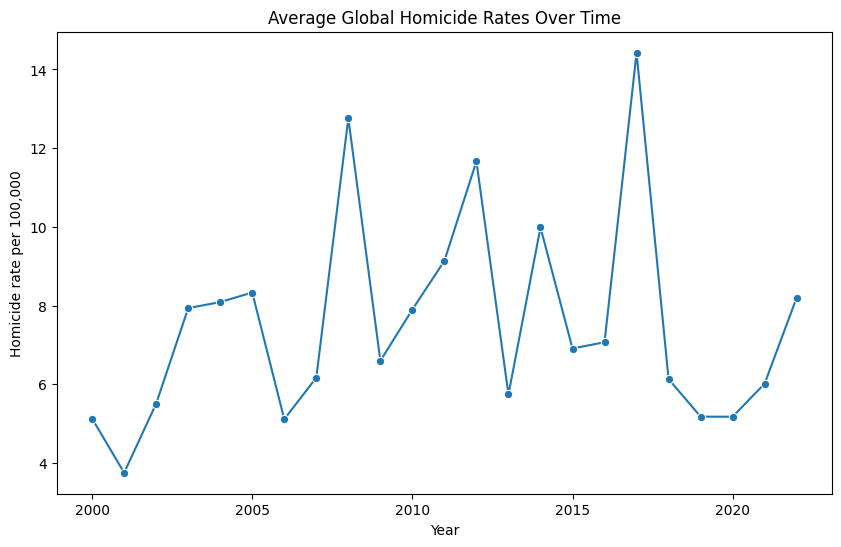

C:\Users\lunab\AppData\Local\Temp\ipykernel_6484\1934730879.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Value", y="Country", palette="Reds_r")


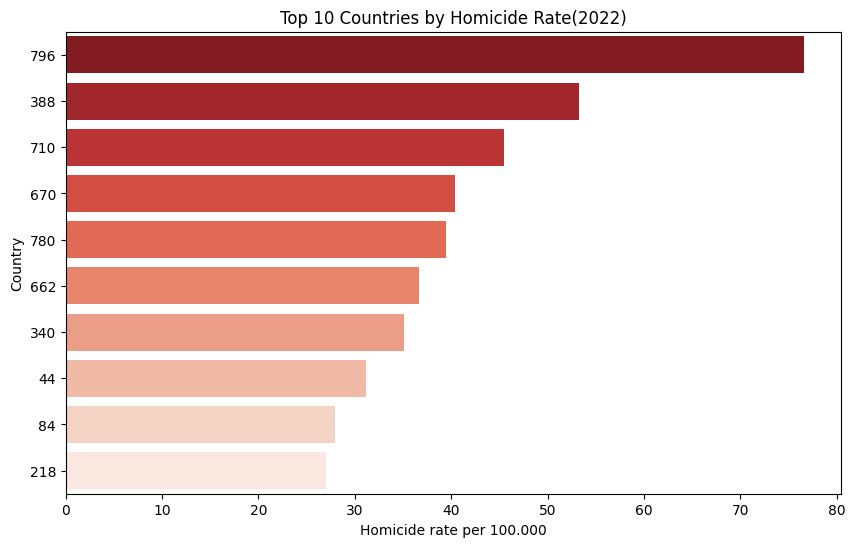

In [6]:
#Plot global homicide date(all countries)
global_trend = homicide_df.groupby("Year")["Value"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=global_trend.index, y=global_trend.values, marker="o")
plt.title("Average Global Homicide Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Homicide rate per 100,000")
plt.show()

#Top 10 countries with highest homicide rate(up to 2022)
latest_year = homicide_df["Year"].max()
top10 = (homicide_df[homicide_df["Year"] == latest_year].sort_values("Value", ascending=False).head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="Value", y="Country", palette="Reds_r")
plt.title(f"Top 10 Countries by Homicide Rate({latest_year})")
plt.xlabel("Homicide rate per 100.000")
plt.ylabel("Country")
plt.show()

In [7]:
#Feature engineering
homicide_df = df[df["Series"].str.contains("homicide rates per 100,000", case=False, na=False)]

homicide_df = homicide_df.sort_values(by=["Country", "Year"])
homicide_df["YoY_change"] = homicide_df.groupby("Country")["Value"].pct_change() * 100

regional_df = homicide_df[homicide_df["Country"].str.contains("Total", case=False)]
regional_avg = regional_df.groupby(["Country", "Year"])["Value"].mean().reset_index()

pivot_df = df.pivot_table(
    index=["Country", "Year"],
    columns="Series",
    values="Value",
    aggfunc="mean"
).reset_index()

pivot_df.columns = [col.replace(" ", "_").replace(",", "").replace("%", "pct") for col in pivot_df.columns]

#Preview new features
print("Homicide dataframe with YoY change:")
display(homicide_df.head())

print("\nRegional averages:")
display(regional_avg.head())

print("\nPivoted dataframe (wide format):")
display(pivot_df.head())

Homicide dataframe with YoY change:


,Country,Countries_Total,Year,Series,Value,Footnotes,Source,YoY_change
0,1,"Total, all countries or areas",2005,"Intentional homicide rates per 100,000",6.3,Estimate.,United Nations Office on Drugs and Crime (UNOD...,NaN
3,1,"Total, all countries or areas",2010,"Intentional homicide rates per 100,000",6.1,Estimate.,United Nations Office on Drugs and Crime (UNOD...,-3.174603
6,1,"Total, all countries or areas",2015,"Intentional homicide rates per 100,000",5.9,Estimate.,United Nations Office on Drugs and Crime (UNOD...,-3.278689
9,1,"Total, all countries or areas",2022,"Intentional homicide rates per 100,000",5.6,Estimate.,United Nations Office on Drugs and Crime (UNOD...,-5.084746
916,100,Bulgaria,2005,"Intentional homicide rates per 100,000",2.5,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN



Regional averages:


,Country,Year,Value



Pivoted dataframe (wide format):


,Country,Year,Assault_rate_per_100000_population,Intentional_homicide_rates_per_100000,Kidnapping_at_the_national_level_rate_per_100000,Percentage_of_male_and_female_intentional_homicide_victims_Female,Percentage_of_male_and_female_intentional_homicide_victims_Male,Theft_at_the_national_level_rate_per_100000_population,Total_Sexual_Violence_at_the_national_level_rate_per_100000
0,1,2005,NaN,6.3,NaN,2.6,10.1,NaN,NaN
1,1,2010,NaN,6.1,NaN,2.4,9.7,NaN,NaN
2,1,2015,NaN,5.9,NaN,2.3,9.5,NaN,NaN
3,1,2022,NaN,5.6,NaN,2.2,9.0,NaN,NaN
4,100,2005,46.8,2.5,2.4,1.3,3.9,551.7,13.3
